In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
train = pd.read_csv("./mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv("./mnist_test.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.isnull().sum().sum()

0

In [7]:
x_train = train.drop(['label'], axis=1).values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
x_train = x_train.astype('float32')/255

In [9]:
y_train = train['label'].values

In [10]:
model = Sequential()
model.add(Dense(128, input_shape = (784, ) ,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

C:\Users\dmwad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
r = model.fit(x_train, y_train, validation_split= 0.2, batch_size = 128, epochs = 11)

Epoch 1/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7692 - loss: 0.7739 - val_accuracy: 0.9482 - val_loss: 0.1814
Epoch 2/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.1985 - val_accuracy: 0.9626 - val_loss: 0.1279
Epoch 3/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9601 - loss: 0.1370 - val_accuracy: 0.9653 - val_loss: 0.1103
Epoch 4/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9693 - loss: 0.1048 - val_accuracy: 0.9712 - val_loss: 0.0969
Epoch 5/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 0.0830 - val_accuracy: 0.9718 - val_loss: 0.0897
Epoch 6/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9793 - loss: 0.0680 - val_accuracy: 0.9756 - val_loss: 0.0826
Epoch 7/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9829 - loss: 0.0569 - val_accuracy: 0.9739 - val_loss: 0.0838
Epoch 8/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9842 - loss: 0.0506 - val_accuracy: 0.

In [12]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values

In [13]:
x_test = x_test.astype('float32') / 255

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9747 - loss: 0.0870


In [15]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

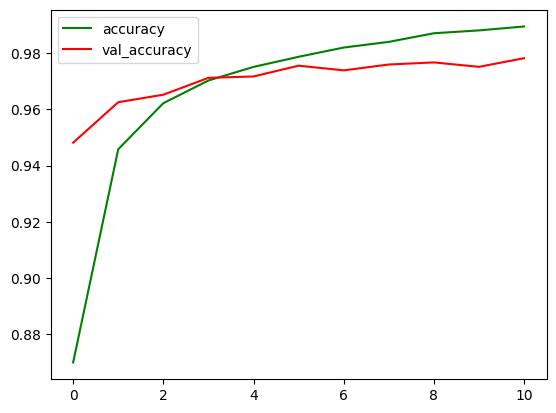

In [16]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

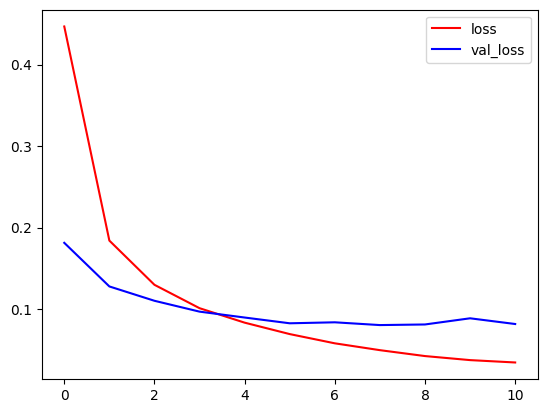

In [17]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()

In [ ]:
'''
Here are **viva questions** corresponding to each **code snippet** in the provided code. Each question is followed by its **answer**, giving you a comprehensive understanding of what can be asked for each part of the code:

---

### **1. Importing Libraries:**
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
```

**Viva Questions:**
- **What is the role of the `pandas` library in this code?**
  - **Answer**: `pandas` is used to load, manipulate, and analyze data in tabular form. In this case, it loads the MNIST dataset from CSV files and handles the DataFrame operations.
  
- **Why do we need `numpy` in this project?**
  - **Answer**: `numpy` is essential for handling numerical data in the form of arrays and matrices. The dataset is converted to numpy arrays to be processed by the neural network.

- **How does `matplotlib.pyplot` help in this code?**
  - **Answer**: `matplotlib.pyplot` is used to plot the training and validation metrics such as accuracy and loss over epochs to visualize model performance.

- **What is the significance of `seaborn` in this project?**
  - **Answer**: While `seaborn` is imported, it is not used in this code snippet. It is generally used for better data visualization, offering a higher-level interface compared to `matplotlib`.

- **What is the purpose of `tensorflow.keras.layers` and why are layers like `Dense`, `Dropout`, etc., used?**
  - **Answer**: These layers are used to build the neural network. `Dense` is used for fully connected layers, `Dropout` for regularization, `MaxPooling2D` for reducing spatial dimensions in convolutional networks, and `Conv2D` for applying convolution operations (although not used here).

- **What is `to_categorical` and when would you use it?**
  - **Answer**: `to_categorical` is used to convert integer labels into one-hot encoded format. It’s useful in classification tasks where each output class needs to be represented as a vector.

---

### **2. Loading Data:**
```python
train = pd.read_csv("./mnist_train.csv")
train
test = pd.read_csv("./mnist_test.csv")
test
```

**Viva Questions:**
- **What does `pd.read_csv()` do?**
  - **Answer**: `pd.read_csv()` reads a CSV file and loads it into a pandas DataFrame. In this code, it loads the training and test sets of the MNIST dataset.

- **Why do we use `train` and `test` DataFrames in this code?**
  - **Answer**: `train` contains the training data, including both the image pixels and the corresponding labels, and `test` contains the test data, which is used for model evaluation after training.

- **What kind of data is in the MNIST CSV files?**
  - **Answer**: The MNIST CSV files contain pixel values of 28x28 grayscale images as rows, with one column for labels (target class, digit 0-9).

---

### **3. Checking for Missing Values:**
```python
train.isnull().sum().sum()
```

**Viva Questions:**
- **What does `isnull()` do?**
  - **Answer**: `isnull()` checks if there are any missing or NaN values in the DataFrame. It returns a DataFrame of the same shape with `True` for missing values and `False` otherwise.

- **Why is `sum().sum()` used here?**
  - **Answer**: `sum()` is first applied to count the missing values column-wise, and the second `sum()` totals them across all columns, giving the total number of missing values in the DataFrame.

- **What will happen if there are missing values in the dataset?**
  - **Answer**: Missing values can disrupt training, and techniques like imputation or removal of rows/columns might be needed.

---

### **4. Data Preprocessing:**
```python
x_train = train.drop(['label'], axis=1).values
x_train
x_train = x_train.astype('float32')/255
y_train = train['label'].values
```

**Viva Questions:**
- **What does `train.drop(['label'], axis=1)` do?**
  - **Answer**: It drops the 'label' column (target variable) from the DataFrame, leaving only the image data for training.

- **Why is `.values` used here?**
  - **Answer**: `.values` converts the DataFrame into a NumPy array, which is required for neural network processing in TensorFlow.

- **Why do we convert `x_train` to `float32` and divide by 255?**
  - **Answer**: Converting to `float32` ensures that the pixel values are in a format suitable for computations. Dividing by 255 normalizes the pixel values to the range [0, 1], which improves training efficiency.

- **What does `y_train = train['label'].values` do?**
  - **Answer**: This extracts the 'label' column from the `train` DataFrame as the target variable (`y_train`), which will be used to train the model.

---

### **5. Building the Neural Network Model:**
```python
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
```

**Viva Questions:**
- **What is the difference between `Sequential()` and `Model()` in Keras?**
  - **Answer**: `Sequential()` is a linear stack of layers. `Model()` allows more complex architectures with non-linear connections between layers.

- **Why are `Dense` layers used in this model?**
  - **Answer**: `Dense` layers are fully connected layers, where each neuron in the layer is connected to every neuron in the previous layer. They are essential for learning complex patterns in the data.

- **Why is `input_shape=(784,)` specified?**
  - **Answer**: The input shape of 784 corresponds to the flattened 28x28 images, each with 784 pixels.

- **What does `relu` stand for and why is it used?**
  - **Answer**: `ReLU` stands for Rectified Linear Unit, which is a non-linear activation function that helps the model learn non-linear relationships in the data. It is widely used in deep learning models.

- **Why do we use `Dropout`?**
  - **Answer**: Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to zero during training.

- **What does `softmax` do in the output layer?**
  - **Answer**: `Softmax` converts the raw output values into a probability distribution across the 10 classes, ensuring the sum of the probabilities is 1.

---

### **6. Compiling the Model:**
```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

**Viva Questions:**
- **What is the `adam` optimizer?**
  - **Answer**: Adam is an optimization algorithm that computes adaptive learning rates for each parameter by considering both the first and second moments of the gradients. It is widely used for training deep learning models.

- **Why is `sparse_categorical_crossentropy` used as the loss function?**
  - **Answer**: `Sparse_categorical_crossentropy` is used when the labels are integers (not one-hot encoded). It is suitable for multi-class classification problems.

- **What does `metrics=['accuracy']` mean?**
  - **Answer**: It specifies that the model should track accuracy during training and evaluation. Accuracy measures the percentage of correct predictions.

---

### **7. Model Summary:**
```python
model.summary()
```

**Viva Questions:**
- **What information does `model.summary()` provide?**
  - **Answer**: It provides a summary of the model architecture, including the layer types, output shapes, the number of parameters, and the total number of trainable parameters.

- **Why is understanding the model summary important?**
  - **Answer**: The model summary helps ensure that the model is built as expected, and it can help debug if the architecture or layer connections are not as intended.

---

### **8. Training the Model:**
```python
r = model.fit(x_train, y_train, validation_split=0.2, batch_size=128, epochs=11)
```

**Viva Questions:**
- **What does `validation_split=0.2` mean?**
  - **Answer**: It means 20% of the training data will be used for validation during the training process. This helps track model performance on unseen data.

- **What is the significance of `batch_size=128`?**
  - **Answer**: The batch size determines how many samples are processed before the model's internal parameters are updated. A larger batch size may speed up training but requires more memory.

- **Why is the model trained for 11 epochs?**
  - **Answer**: 11 epochs means the model will see the entire training data 

11 times. The number of epochs is a hyperparameter that needs to be tuned based on performance.

---

### **9. Evaluating the Model:**
```python
test_loss, test_accuracy = model.evaluate(x_test, y_test)
```

**Viva Questions:**
- **What does `model.evaluate()` do?**
  - **Answer**: It evaluates the model on the test data and returns the loss and accuracy metrics.

- **Why is it important to evaluate the model on the test set?**
  - **Answer**: Evaluating on the test set helps assess how well the model generalizes to new, unseen data.

---

### **10. Plotting Training and Validation Metrics:**
```python
plt.plot(r.history['accuracy'], label='accuracy', color='green')
plt.plot(r.history['val_accuracy'], label='val_accuracy', color='red')
plt.legend()
plt.plot(r.history['loss'], label='loss', color='red')
plt.plot(r.history['val_loss'], label='val_loss', color='blue')
plt.legend()
```

**Viva Questions:**
- **Why do we plot training and validation accuracy?**
  - **Answer**: Plotting training and validation accuracy helps monitor the model's learning process and check for issues like overfitting or underfitting.

- **What is the significance of plotting `loss` and `val_loss`?**
  - **Answer**: Plotting loss helps track the model's error during training. `val_loss` is critical for understanding how the model is performing on unseen data.

---

These questions and answers, coupled with the detailed line-by-line explanation, should help you prepare thoroughly for your viva on this code.
'''